In [16]:
!pip install pandas matplotlib seaborn


In [17]:
import pandas as pd
df=pd.read_csv("stocks.csv")
print(df)

    Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  64120100  
2    150.639999  56007100  

In [18]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.shape

(248, 8)

In [20]:
df.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [21]:
df.head(5)


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [22]:
df.tail(5)
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [23]:
df.isnull().sum()


,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [24]:
df.isnull().any()

,0
Ticker,False
Date,False
Open,False
High,False
Low,False
Close,False
Adj Close,False
Volume,False


In [25]:
duplicate=df.duplicated().sum()
print(duplicate)

0


In [26]:
duplicates=df.drop_duplicates(inplace=True)
print(duplicates)

None


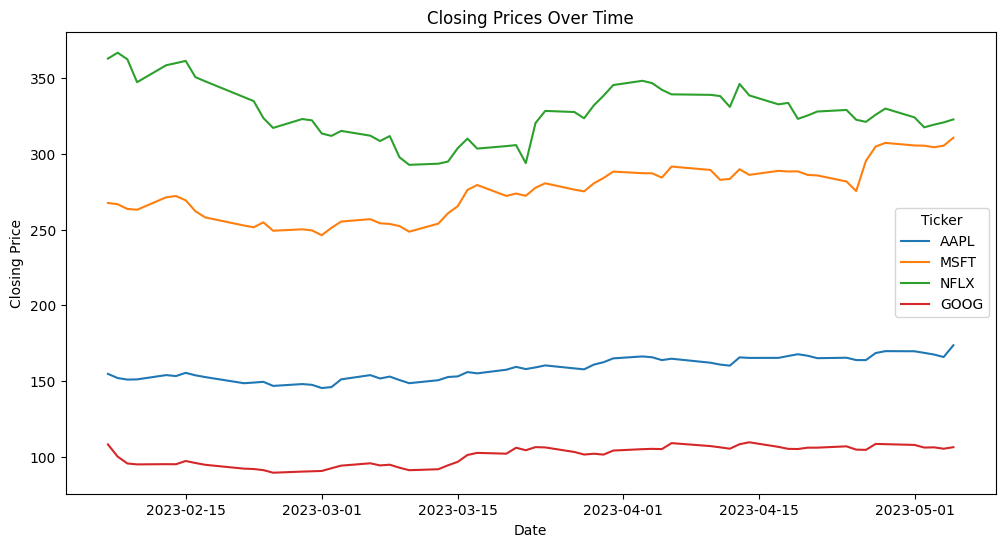

In [28]:
# Line plot of closing prices
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Close', hue='Ticker')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend(title="Ticker")
plt.show()

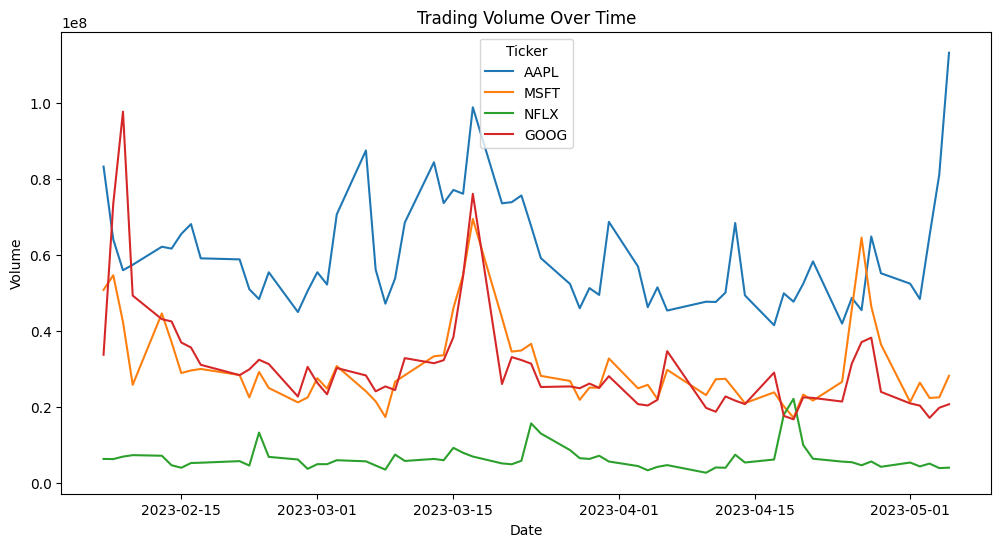

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Volume', hue='Ticker')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


/tmp/ipython-input-2755249572.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticker', y='Range', data=df, palette='Set2')


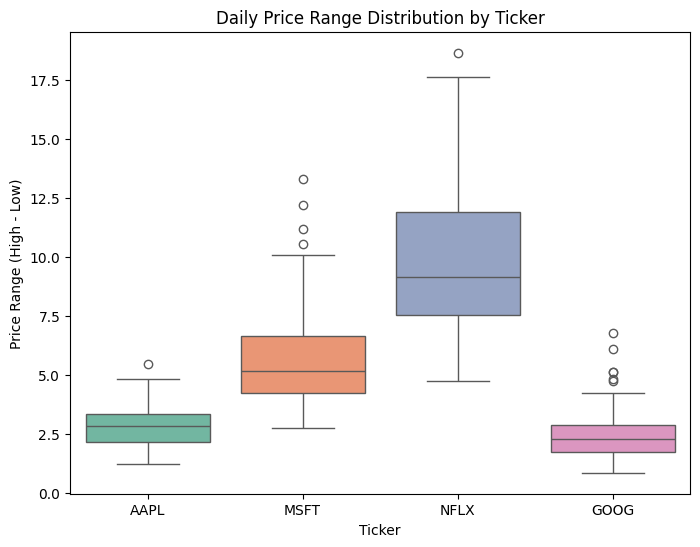

In [30]:
df['Range'] = df['High'] - df['Low']

plt.figure(figsize=(8,6))
sns.boxplot(x='Ticker', y='Range', data=df, palette='Set2')
plt.title("Daily Price Range Distribution by Ticker")
plt.ylabel("Price Range (High - Low)")
plt.show()


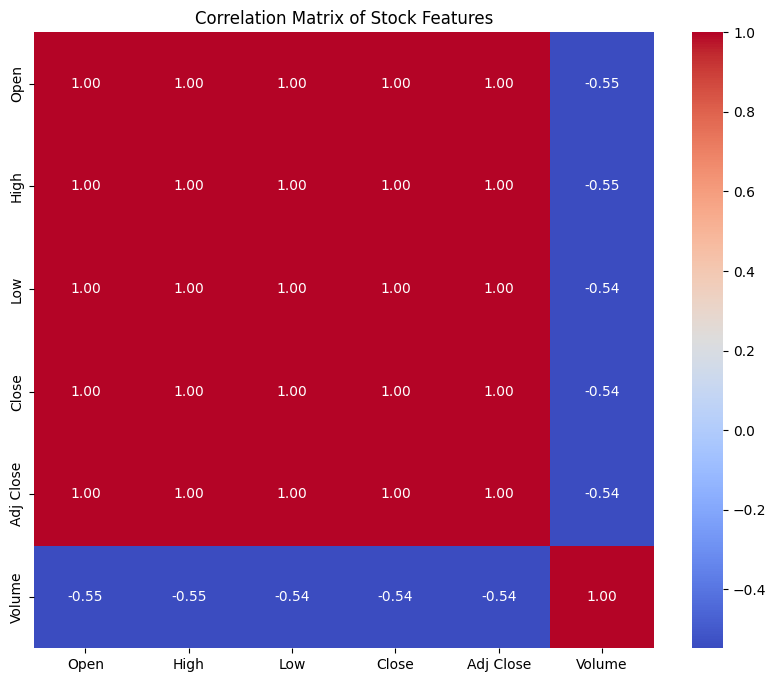

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Open','High','Low','Close','Adj Close','Volume']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Stock Features")
plt.show()


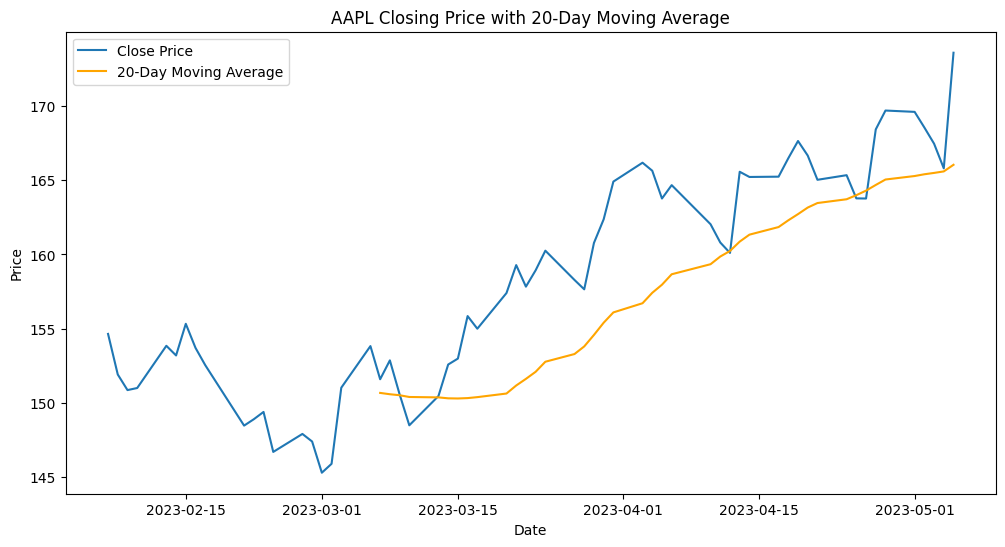

In [32]:
aapl = df[df['Ticker']=='AAPL'].copy()
aapl['MA20'] = aapl['Close'].rolling(20).mean()

plt.figure(figsize=(12,6))
plt.plot(aapl['Date'], aapl['Close'], label='Close Price')
plt.plot(aapl['Date'], aapl['MA20'], label='20-Day Moving Average', color='orange')
plt.title("AAPL Closing Price with 20-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


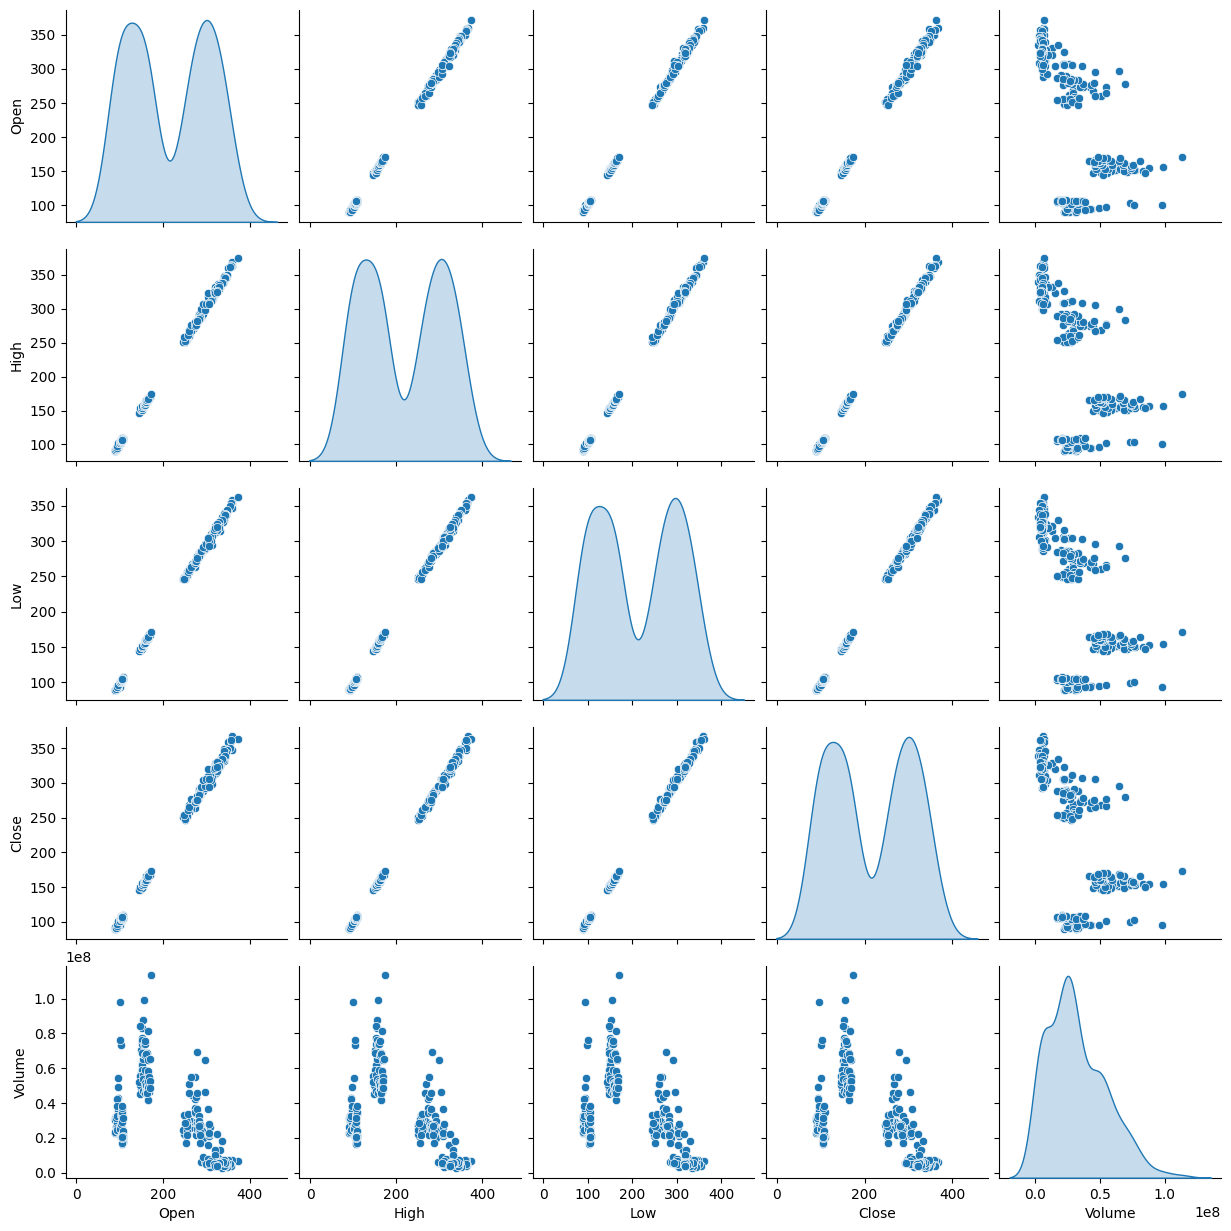

In [34]:
#Pairplot for Feature Relationships
sns.pairplot(df[['Open','High','Low','Close','Volume']], diag_kind='kde')
plt.show()
